# image recognition using SVM&PCA

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

# Importing images from Folder

In [5]:
ajith=os.listdir("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/ ajith close face shot")
Kamal=os.listdir("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/Kamalhasan close face shot")
Rajini=os.listdir("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/Rajinikanth close face shot")

# Reading Images as matrix

In [6]:
limit=10
Ajith_images=[None]*limit
c=0
for i in ajith:
    if (c<limit):
        Ajith_images[c]=imread("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/ ajith close face shot/"+i)
        c+=1
    else:
        break
      
    


In [7]:
limit=10
Kamal_images=[None]*limit
c=0
for i in Kamal:
    if (c<limit):
        Kamal_images[c]=imread("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/Kamalhasan close face shot/"+i)
        c+=1
    else:
        break

In [8]:
limit=10
Rajini_images=[None]*limit
c=0
for i in Rajini:
    if (c<limit):
        Rajini_images[c]=imread("C:/Users/PRADISH/Desktop/Desktop 26.12.2023/Desktop_26_8_2022/PDS TEST1/Actor data set/Rajinikanth close face shot/"+i)
        c+=1
    else:
        break

# DISPLAYING IMAGE DATA IN LIST

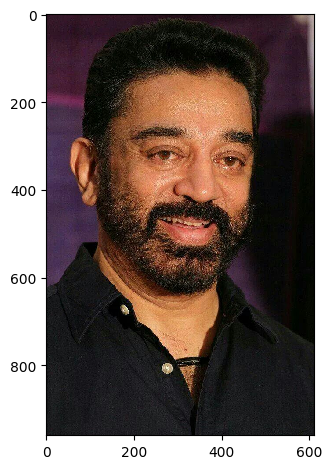

In [9]:
imshow(Kamal_images[9])

# CONVERTING TO GRAYSCALE

In [10]:

Ajith_Gray=[None]*limit
c=0
for i in ajith:
    if (c<limit):
        Ajith_Gray[c]=rgb2gray(Ajith_images[c])
        c+=1
    else:
        break

In [11]:

Kamal_Gray=[None]*limit
c=0
for i in Kamal:
    if (c<limit):
        Kamal_Gray[c]=rgb2gray(Kamal_images[c])
        c+=1
    else:
        break

In [12]:

Rajini_Gray=[None]*limit
c=0
for i in Rajini:
    if (c<limit):
        Rajini_Gray[c]=rgb2gray(Rajini_images[c])
        c+=1
    else:
        break

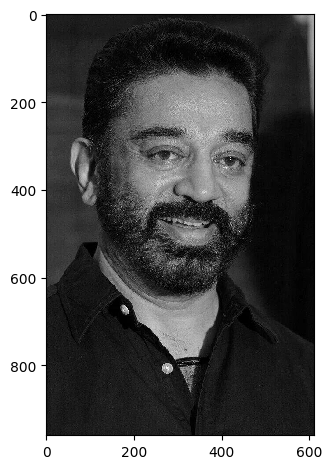

In [13]:
imshow(Kamal_Gray[9])

# FINDING IMAGE SIZE

In [14]:
Kamal_Gray[9].shape

(960, 610)

# Reshaping the images

In [15]:
for i in range(10):
    A=Ajith_Gray[i]
    Ajith_Gray[i]=resize(A,(512,512))

In [16]:
for i in range(10):
    R=Rajini_Gray[i]
    Rajini_Gray[i]=resize(R,(512,512))

In [17]:
for i in range(10):
    K=Kamal_Gray[i]
    Kamal_Gray[i]=resize(K,(512,512))

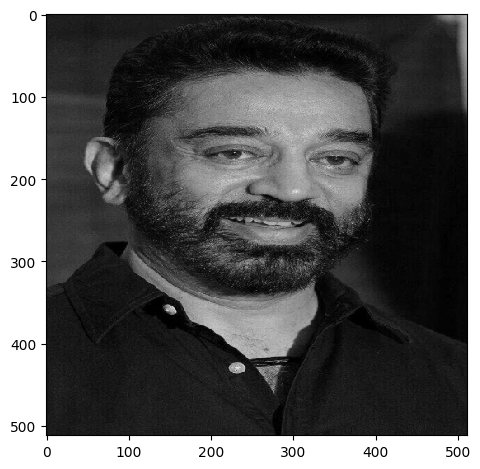

In [18]:
imshow(Kamal_Gray[9])

# MATRIX TO VECTOR CONVERSION

## A . Finding the Number of images

In [19]:
Len_Ajith_Image=len(Ajith_Gray)

In [20]:
Len_Kamal_Image=len(Kamal_Gray)

In [21]:
Len_Rajini_Image=len(Rajini_Gray)

## B. Flattening the Image 

In [22]:
Img_Size_Ajith=Ajith_Gray[1].shape

In [23]:
Flattern_size_Ajith=Img_Size_Ajith[0]*Img_Size_Ajith[1]

In [24]:
Flattern_size_Ajith

262144

In [25]:
for i in range(Len_Ajith_Image):
    Ajith_Gray[i]=np.ndarray.flatten(Ajith_Gray[i]).reshape(Flattern_size_Ajith,1)

In [33]:
Img_Size_Kamal=Kamal_Gray[1].shape
Flattern_size_Kamal=Img_Size_Kamal[0]*Img_Size_Kamal[1]
for i in range(Len_Kamal_Image):
    Kamal_Gray[i]=np.ndarray.flatten(Kamal_Gray[i]).reshape(Flattern_size_Kamal,1)

In [34]:
Img_Size_Rajini=Rajini_Gray[1].shape
Flattern_size_Rajini=Img_Size_Rajini[0]*Img_Size_Rajini[1]
for i in range(Len_Kamal_Image):
    Rajini_Gray[i]=np.ndarray.flatten(Rajini_Gray[i]).reshape(Flattern_size_Rajini,1)

# Creating Data set

In [26]:
Ajith_Gray=np.dstack(Ajith_Gray)

In [27]:
Ajith_Gray=np.rollaxis(Ajith_Gray,axis=2,start=0)

In [28]:
Ajith_Gray.shape

(10, 262144, 1)

In [29]:
Ajith_Gray=Ajith_Gray.reshape(Len_Ajith_Image,Flattern_size_Ajith)

In [30]:
Ajith_data=pd.DataFrame(Ajith_Gray)

In [31]:
Ajith_data["label"]="Ajith"

In [35]:
Kamal_Gray=np.dstack(Kamal_Gray)
Kamal_Gray=np.rollaxis(Kamal_Gray,axis=2,start=0)
Kamal_Gray=Kamal_Gray.reshape(Len_Kamal_Image,Flattern_size_Kamal)
Kamal_data=pd.DataFrame(Kamal_Gray)
Kamal_data["label"]="Kamal"

In [36]:
Rajini_Gray=np.dstack(Rajini_Gray)
Rajini_Gray=np.rollaxis(Rajini_Gray,axis=2,start=0)
Rajini_Gray=Rajini_Gray.reshape(Len_Rajini_Image,Flattern_size_Rajini)
Rajini_data=pd.DataFrame(Rajini_Gray)
Rajini_data["label"]="Rajini"

# Creating Actor data set

In [41]:
actor=pd.concat([Ajith_data,Kamal_data,Rajini_data])

In [42]:
actor

0         1         2         3         4         5         6  \
0  0.622591  0.597723  0.597455  0.607045  0.608270  0.619215  0.626953   
1  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.219871  0.214969  0.214969  0.223303  0.231636  0.225263  0.234991   
4  0.985929  0.981272  0.995537  0.995767  0.997057  0.997066  0.996729   
5  0.090293  0.090293  0.090293  0.089873  0.082869  0.082449  0.082450   
6  0.176973  0.176973  0.176973  0.177477  0.180796  0.180803  0.180918   
7  0.484711  0.487288  0.491312  0.495543  0.496280  0.496280  0.498234   
8  0.655730  0.664048  0.678949  0.689768  0.696841  0.698557  0.700885   
9  0.317928  0.292931  0.280875  0.314289  0.321167  0.323569  0.321368   
0  0.123959  0.123959  0.123959  0.123959  0.123959  0.123962  0.124438   
1  0.752881  0.752881  0.752881  0.752881  0.752881  0.753093  0.754398   
2  0.699413  0.696101  0.654865  0.588229  0.553069  0.555365  0.575561   
3  0.824058  0.824058  0.824058  0.824058  0.824058  0.824058  0.824058   
4  0.000600  0.000701  0.000334  0.000000  0.000000  0.000000  0.001304   
5  0.906223  0.906223  0.906223  0.906223  0.906223  0.906223  0.906223   
6  0.049186  0.049925  0.043604  0.043410  0.046555  0.045139  0.048823   
7  0.401467  0.400728  0.398675  0.390522  0.362858  0.340471  0.310994   
8  0.356593  0.354297  0.338141  0.329813  0.313417  0.297431  0.307836   
9  0.124396  0.127775  0.126916  0.122103  0.118673  0.118300  0.119182   
0  0.801540  0.801540  0.801540  0.801540  0.801540  0.801540  0.801540   
1  0.832877  0.821228  0.810245  0.812179  0.794961  0.728977  0.717799   
2  0.424274  0.424399  0.426062  0.426706  0.426706  0.426706  0.426706   
3  0.024463  0.024463  0.024463  0.024463  0.024463  0.024463  0.024463   
4  0.423592  0.420488  0.423100  0.423715  0.423122  0.420615  0.416903   
5  0.516635  0.520490  0.527319  0.532218  0.535353  0.536677  0.534802   
6  0.987300  0.986125  0.974358  0.991007  0.985211  0.976387  0.984824   
7  0.600784  0.597046  0.595599  0.591924  0.585865  0.578330  0.566911   
8  0.148130  0.151971  0.156080  0.157685  0.157482  0.154794  0.151994   
9  0.988801  0.988801  0.989002  0.989913  0.993031  0.996278  0.995906   

          7         8         9  ...    262135    262136    262137    262138  \
0  0.630468  0.633298  0.638429  ...  0.796756  0.784773  0.769802  0.782925   
1  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
2  0.000000  0.000000  0.000000  ...  0.779889  0.793934  0.804571  0.807646   
3  0.243768  0.243120  0.246551  ...  0.265389  0.186272  0.164060  0.202587   
4  0.998513  0.998643  0.998433  ...  0.993194  0.993113  0.992468  0.993163   
5  0.082943  0.087554  0.088640  ...  0.090373  0.082233  0.078895  0.074070   
6  0.183685  0.186668  0.186671  ...  0.952622  0.957815  0.951478  0.946457   
7  0.497345  0.492537  0.490989  ...  0.041027  0.037266  0.037266  0.037266   
8  0.700886  0.700886  0.700886  ...  0.000858  0.000858  0.001423  0.000914   
9  0.312133  0.321822  0.323324  ...  0.037936  0.015472  0.013055  0.017143   
0  0.126014  0.126324  0.126556  ...  0.990513  0.990513  0.990513  0.990513   
1  0.756827  0.757097  0.757166  ...  0.680770  0.687280  0.693163  0.694675   
2  0.577958  0.576306  0.583343  ...  0.053888  0.060303  0.072640  0.066367   
3  0.824058  0.824058  0.824058  ...  0.669053  0.653742  0.608812  0.547236   
4  0.002912  0.003458  0.003083  ...  0.097448  0.021970  0.010750  0.001731   
5  0.906223  0.906223  0.907472  ...  0.010913  0.006436  0.006436  0.006436   
6  0.052513  0.050504  0.050415  ...  0.760671  0.776853  0.713633  0.668320   
7  0.286155  0.258680  0.237529  ...  0.592457  0.607944  0.626436  0.642653   
8  0.308030  0.300036  0.300407  ...  0.698123  0.760055  0.777502  0.783520   
9  0.120850  0.114972  0.109582  ...  0.112672  0.127046  0.121936  0.118678   
0  0

# Shuffling within Final dataframe

In [40]:
from sklearn.utils import shuffle

In [43]:
kollywood_indexed=shuffle(actor).reset_index()
kollywood_indexed

index         0         1         2         3         4         5  \
0       5  0.906223  0.906223  0.906223  0.906223  0.906223  0.906223   
1       9  0.988801  0.988801  0.989002  0.989913  0.993031  0.996278   
2       2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3       5  0.516635  0.520490  0.527319  0.532218  0.535353  0.536677   
4       8  0.356593  0.354297  0.338141  0.329813  0.313417  0.297431   
5       5  0.090293  0.090293  0.090293  0.089873  0.082869  0.082449   
6       7  0.600784  0.597046  0.595599  0.591924  0.585865  0.578330   
7       4  0.423592  0.420488  0.423100  0.423715  0.423122  0.420615   
8       0  0.801540  0.801540  0.801540  0.801540  0.801540  0.801540   
9       6  0.987300  0.986125  0.974358  0.991007  0.985211  0.976387   
10      8  0.148130  0.151971  0.156080  0.157685  0.157482  0.154794   
11      1  0.832877  0.821228  0.810245  0.812179  0.794961  0.728977   
12      0  0.123959  0.123959  0.123959  0.123959  0.123959  0.123962   
13      1  0.752881  0.752881  0.752881  0.752881  0.752881  0.753093   
14      6  0.049186  0.049925  0.043604  0.043410  0.046555  0.045139   
15      3  0.024463  0.024463  0.024463  0.024463  0.024463  0.024463   
16      3  0.219871  0.214969  0.214969  0.223303  0.231636  0.225263   
17      4  0.000600  0.000701  0.000334  0.000000  0.000000  0.000000   
18      1  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078   
19      8  0.655730  0.664048  0.678949  0.689768  0.696841  0.698557   
20      7  0.401467  0.400728  0.398675  0.390522  0.362858  0.340471   
21      3  0.824058  0.824058  0.824058  0.824058  0.824058  0.824058   
22      2  0.699413  0.696101  0.654865  0.588229  0.553069  0.555365   
23      2  0.424274  0.424399  0.426062  0.426706  0.426706  0.426706   
24      6  0.176973  0.176973  0.176973  0.177477  0.180796  0.180803   
25      7  0.484711  0.487288  0.491312  0.495543  0.496280  0.496280   
26      9  0.124396  0.127775  0.126916  0.122103  0.118673  0.118300   
27      4  0.985929  0.981272  0.995537  0.995767  0.997057  0.997066   
28      9  0.317928  0.292931  0.280875  0.314289  0.321167  0.323569   
29      0  0.622591  0.597723  0.597455  0.607045  0.608270  0.619215   

           6         7         8  ...    262135    262136    262137    262138  \
0   0.906223  0.906223  0.906223  ...  0.010913  0.006436  0.006436  0.006436   
1   0.995906  0.994676  0.992850  ...  0.846026  0.846957  0.847684  0.847684   
2   0.000000  0.000000  0.000000  ...  0.779889  0.793934  0.804571  0.807646   
3   0.534802  0.532614  0.530529  ...  0.044480  0.045794  0.045644  0.043380   
4   0.307836  0.308030  0.300036  ...  0.698123  0.760055  0.777502  0.783520   
5   0.082450  0.082943  0.087554  ...  0.090373  0.082233  0.078895  0.074070   
6   0.566911  0.555323  0.552063  ...  0.284920  0.131325  0.097815  0.172135   
7   0.416903  0.411352  0.405855  ...  0.290333  0.210488  0.166269  0.285525   
8   0.801540  0.801540  0.801540  ...  0.251570  0.261221  0.269995  0.273031   
9   0.984824  0.984187  0.980405  ...  1.000000  1.000000  0.999705  0.998925   
10  0.151994  0.141337  0.139486  ...  0.634741  0.643196  0.634630  0.616991   
11  0.717799  0.820696  0.822691  ...  0.724010  0.723356  0.721531  0.740743   
12  0.124438  0.126014  0.126324  ...  0.990513  0.990513  0.990513  0.990513   
13  0.754398  0.756827  0.757097  ...  0.680770  0.687280  0.693163  0.694675   
14  0.048823  0.052513  0.050504  ...  0.760671  0.776853  0.713633  0.668320   
15  0.024463  0.024463  0.024463  ...  0.995668  0.995729  0.989880  0.984217   
16  0.234991  0.243768  0.243120  ...  0.265389  0.186272  0.164060  0.202587   
17  0.001304  0.002912  0.003458  ...  0.097448  0.021970  0.010750  0.001731   
18  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
19  0.700885  0.700886  0.700886  ...  0.000858  0.000858  0.001423  0.000914   
20  0.310994  0.286155  0.258680  ...  

# Removing Index from Final Dataset

In [44]:
kollywood_actors=kollywood_indexed.drop(['index'],axis=1)
kollywood_actors

0         1         2         3         4         5         6  \
0   0.906223  0.906223  0.906223  0.906223  0.906223  0.906223  0.906223   
1   0.988801  0.988801  0.989002  0.989913  0.993031  0.996278  0.995906   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.516635  0.520490  0.527319  0.532218  0.535353  0.536677  0.534802   
4   0.356593  0.354297  0.338141  0.329813  0.313417  0.297431  0.307836   
5   0.090293  0.090293  0.090293  0.089873  0.082869  0.082449  0.082450   
6   0.600784  0.597046  0.595599  0.591924  0.585865  0.578330  0.566911   
7   0.423592  0.420488  0.423100  0.423715  0.423122  0.420615  0.416903   
8   0.801540  0.801540  0.801540  0.801540  0.801540  0.801540  0.801540   
9   0.987300  0.986125  0.974358  0.991007  0.985211  0.976387  0.984824   
10  0.148130  0.151971  0.156080  0.157685  0.157482  0.154794  0.151994   
11  0.832877  0.821228  0.810245  0.812179  0.794961  0.728977  0.717799   
12  0.123959  0.123959  0.123959  0.123959  0.123959  0.123962  0.124438   
13  0.752881  0.752881  0.752881  0.752881  0.752881  0.753093  0.754398   
14  0.049186  0.049925  0.043604  0.043410  0.046555  0.045139  0.048823   
15  0.024463  0.024463  0.024463  0.024463  0.024463  0.024463  0.024463   
16  0.219871  0.214969  0.214969  0.223303  0.231636  0.225263  0.234991   
17  0.000600  0.000701  0.000334  0.000000  0.000000  0.000000  0.001304   
18  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078   
19  0.655730  0.664048  0.678949  0.689768  0.696841  0.698557  0.700885   
20  0.401467  0.400728  0.398675  0.390522  0.362858  0.340471  0.310994   
21  0.824058  0.824058  0.824058  0.824058  0.824058  0.824058  0.824058   
22  0.699413  0.696101  0.654865  0.588229  0.553069  0.555365  0.575561   
23  0.424274  0.424399  0.426062  0.426706  0.426706  0.426706  0.426706   
24  0.176973  0.176973  0.176973  0.177477  0.180796  0.180803  0.180918   
25  0.484711  0.487288  0.491312  0.495543  0.496280  0.496280  0.498234   
26  0.124396  0.127775  0.126916  0.122103  0.118673  0.118300  0.119182   
27  0.985929  0.981272  0.995537  0.995767  0.997057  0.997066  0.996729   
28  0.317928  0.292931  0.280875  0.314289  0.321167  0.323569  0.321368   
29  0.622591  0.597723  0.597455  0.607045  0.608270  0.619215  0.626953   

           7         8         9  ...    262135    262136    262137    262138  \
0   0.906223  0.906223  0.907472  ...  0.010913  0.006436  0.006436  0.006436   
1   0.994676  0.992850  0.990063  ...  0.846026  0.846957  0.847684  0.847684   
2   0.000000  0.000000  0.000000  ...  0.779889  0.793934  0.804571  0.807646   
3   0.532614  0.530529  0.528834  ...  0.044480  0.045794  0.045644  0.043380   
4   0.308030  0.300036  0.300407  ...  0.698123  0.760055  0.777502  0.783520   
5   0.082943  0.087554  0.088640  ...  0.090373  0.082233  0.078895  0.074070   
6   0.555323  0.552063  0.536567  ...  0.284920  0.131325  0.097815  0.172135   
7   0.411352  0.405855  0.403577  ...  0.290333  0.210488  0.166269  0.285525   
8   0.801540  0.801540  0.801540  ...  0.251570  0.261221  0.269995  0.273031   
9   0.984187  0.980405  0.975212  ...  1.000000  1.000000  0.999705  0.998925   
10  0.141337  0.139486  0.144262  ...  0.634741  0.643196  0.634630  0.616991   
11  0.820696  0.822691  0.861102  ...  0.724010  0.723356  0.721531  0.740743   
12  0.126014  0.126324  0.126556  ...  0.990513  0.990513  0.990513  0.990513   
13  0.756827  0.757097  0.757166  ...  0.680770  0.687280  0.693163  0.694675   
14  0.052513  0.050504  0.050415  ...  0.760671  0.776853  0.713633  0.668320   
15  0.024463  0.024463  0.024463  ...  0.995668  0.995729  0.989880  0.984217   
16  0.243768  0.243120  0.246551  ...  0.265389  0.186272  0.164060  0.202587   
17  0.002912  0.003458  0.003083  ...  0.097448  0.021970  0.010750  0.001731   
18  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
19  0.700886  0.700886  0.700886  

In [45]:
#Saving DATA set
kollywood_actors.to_csv("actors.csv")

# Assigning Dependent and Independent Variables

In [46]:
x=kollywood_actors.values[:,:-1]
y=kollywood_actors.values[:,-1]

In [64]:
#Splitting DATA

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
print(x_train.shape)
print(x_test.shape)

(15, 262144)
(15, 262144)


# Principle Componant Analysis(PCA) Algorithm

In [65]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10, whiten=True, random_state=1)

In [66]:
pca.fit(x_train)

PCA(n_components=10, random_state=1, whiten=True)

In [67]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Viewing the principle components or eigen faces

In [68]:
eigen = (np.reshape(x[10],(512,512)).astype(np.float64))

# Plotting images one by one as subplots

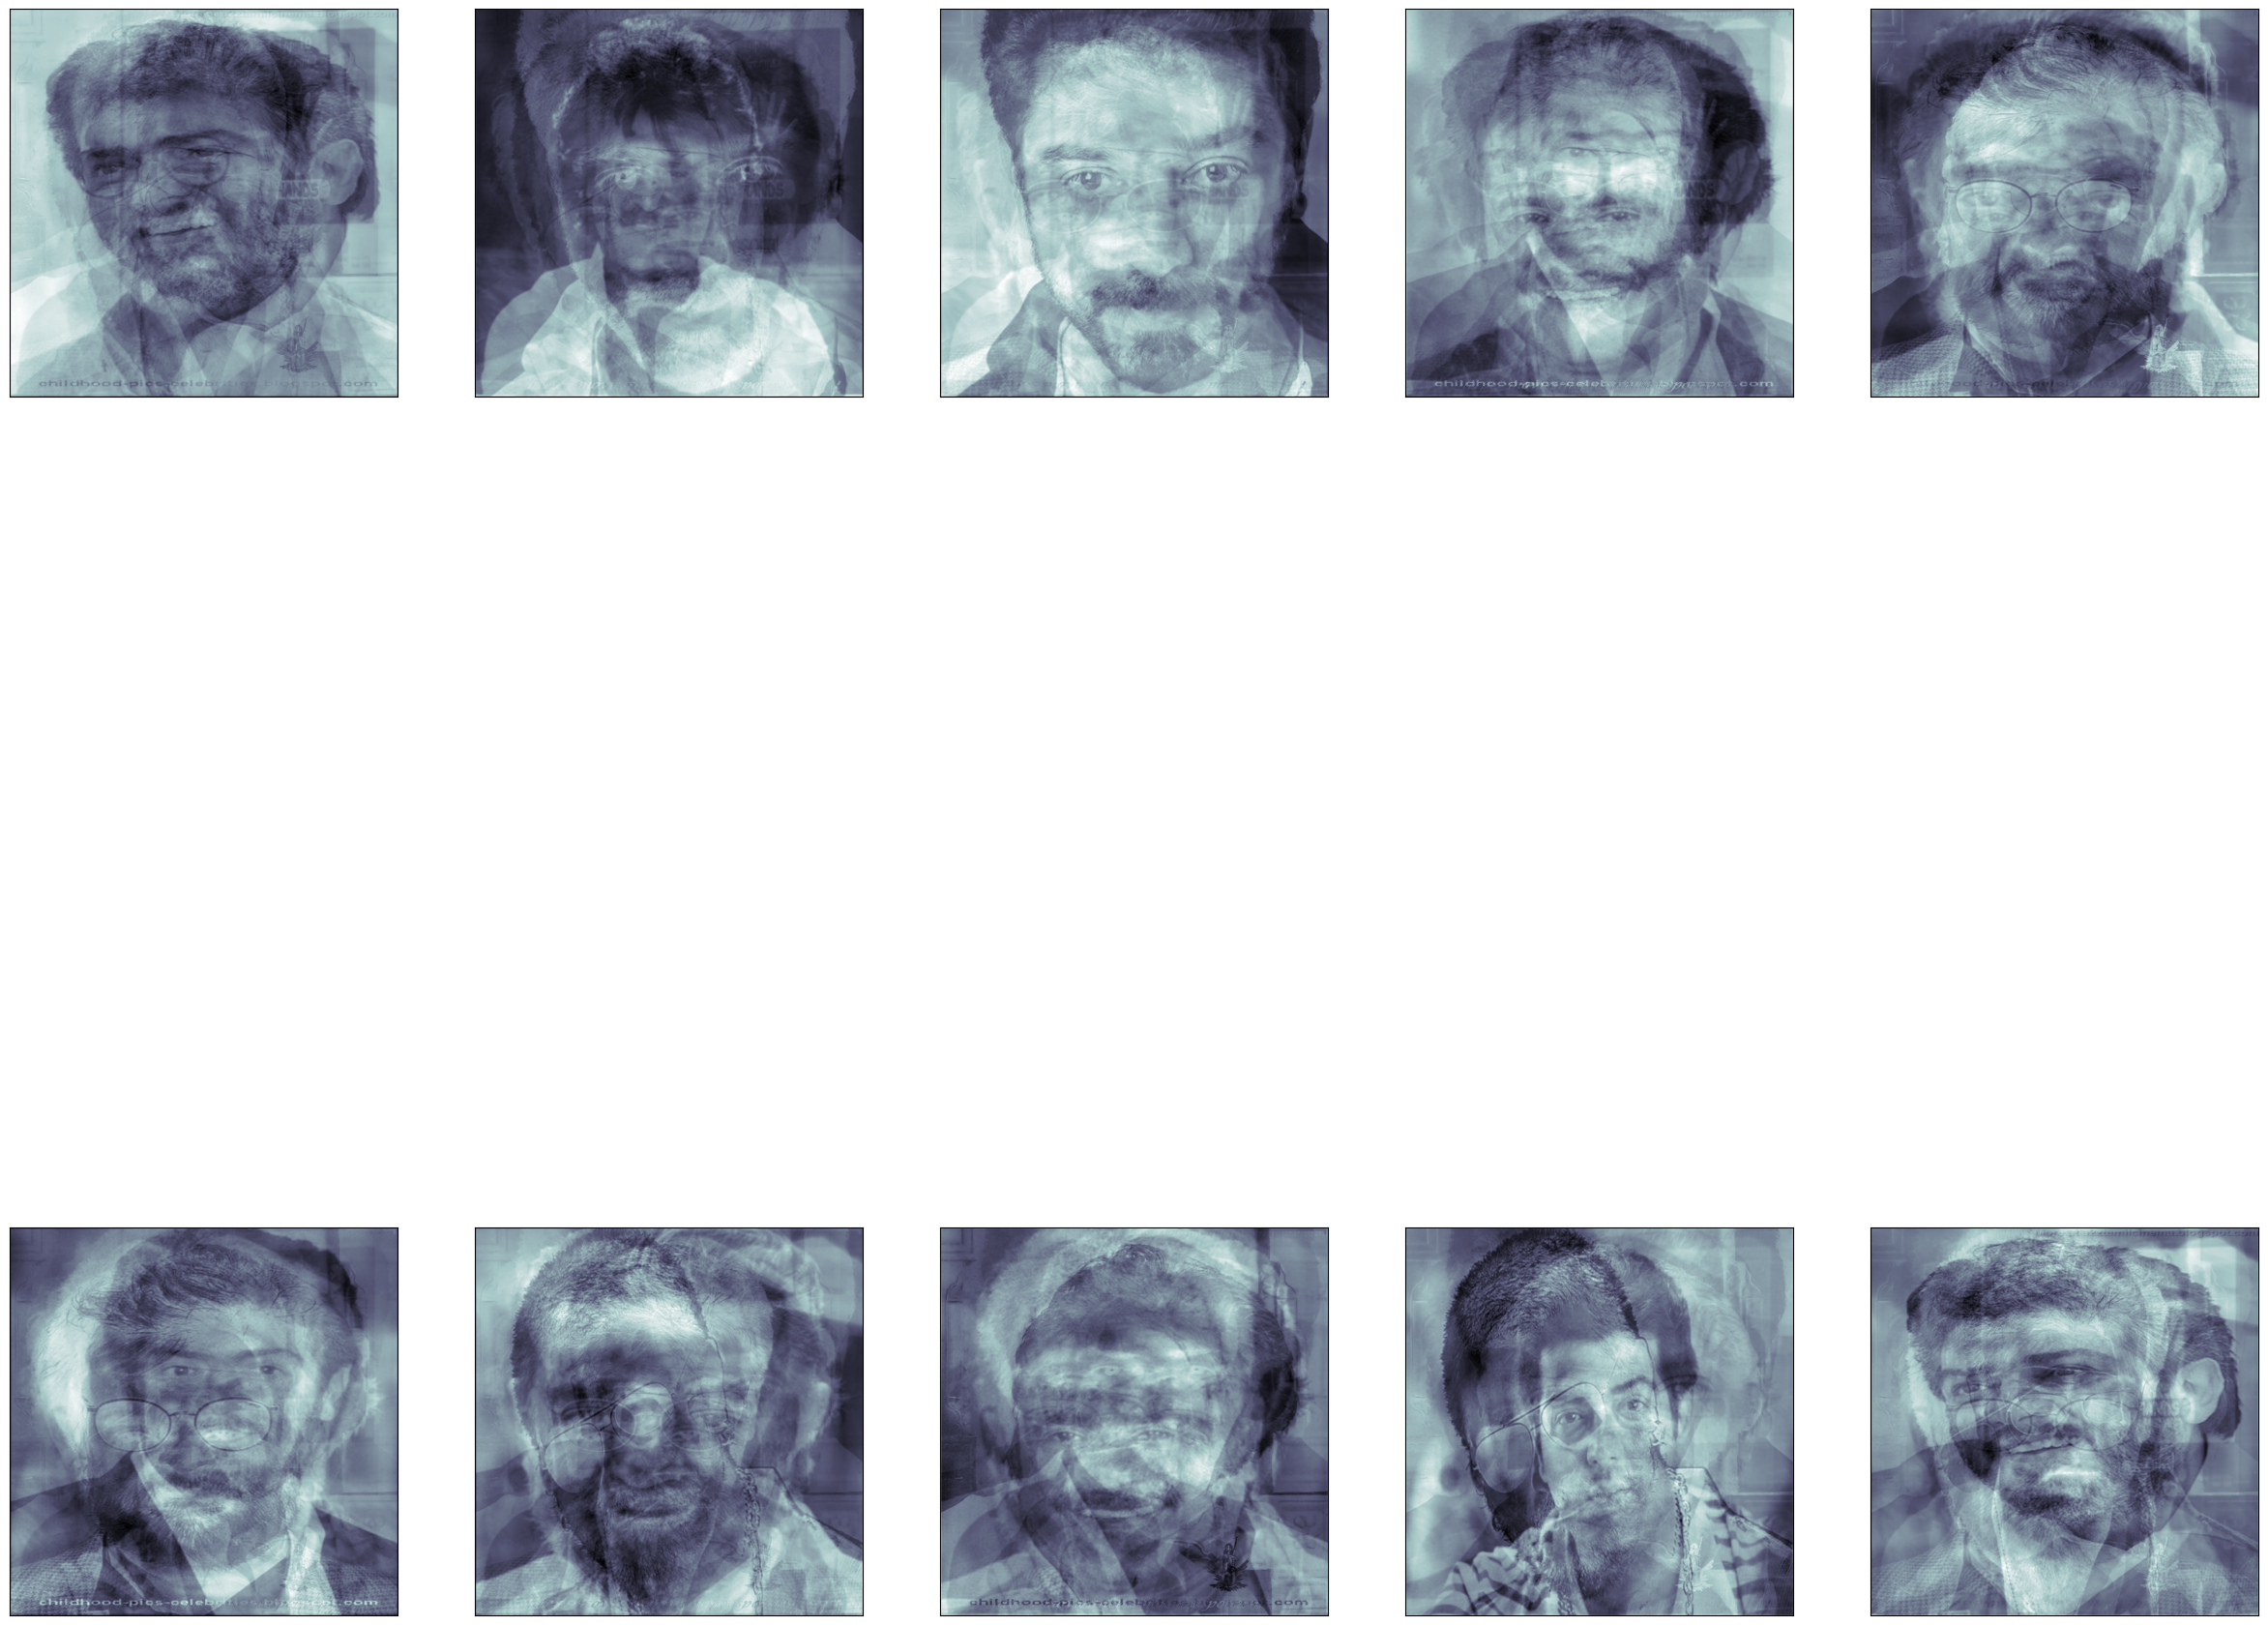

In [69]:
fig = plt.figure(figsize=(30,30))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=plt.cm.bone)

# Support Vector Machines Algorithm

In [70]:
from sklearn import svm

In [71]:
#Classification
clf = svm.SVC(C=2, gamma=0.006, kernel='rbf')
clf.fit(x_train_pca, y_train)

SVC(C=2, gamma=0.006)

# Image Prediction

In [72]:
y_pred = clf.predict(x_test_pca)


# Displaying Predicted out

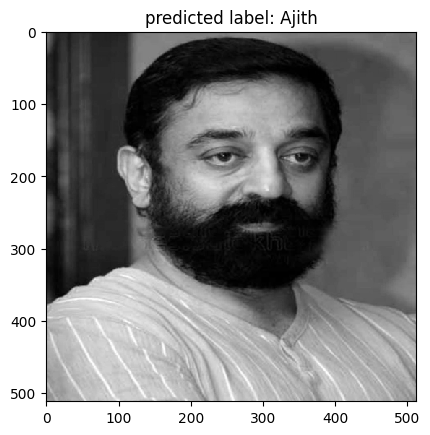

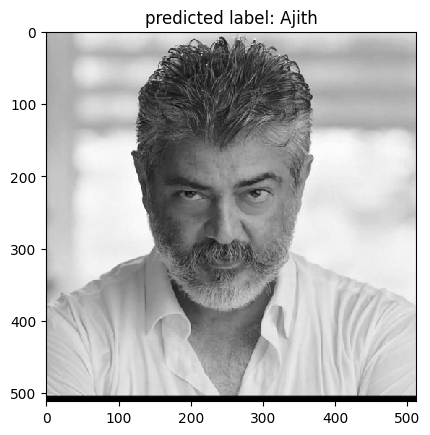

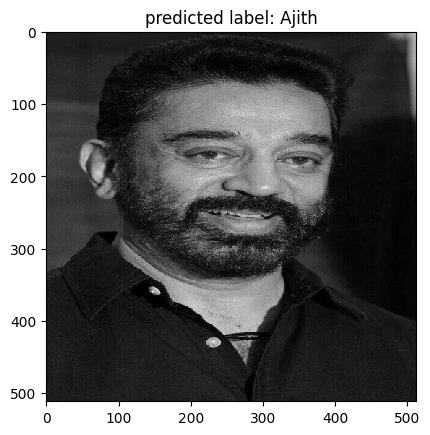

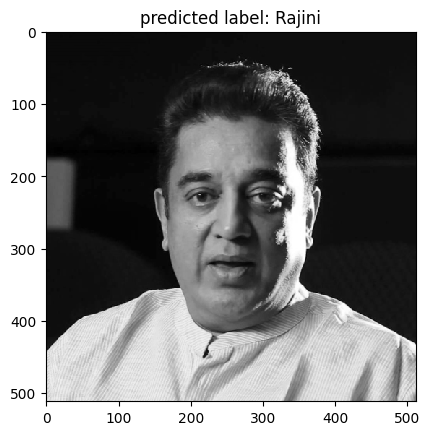

In [76]:
for i in (np.random.randint(0,10,4)):
    predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
    plt.title('predicted label: {0}'. format(y_pred[i]))
    plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
    plt.show()

# Prediction Accuracy

In [77]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

0.4

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4, 0, 0],
       [5, 0, 2],
       [2, 0, 2]], dtype=int64)